<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [2]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [3]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





In [4]:
print("Shape of the image : ", image.shape)

Shape of the image :  (100, 100, 3)


In [7]:
img_single_channel = image[:, :, -1]
print("Shape of the img_single_channel : ", img_single_channel.shape)

Shape of the img_single_channel :  (100, 100)


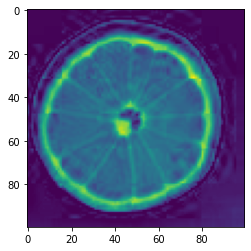

In [8]:
plt.imshow(img_single_channel)
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

In [10]:
img_average_channel = image.mean(axis=2) # axis=2 is the color channel
print("Shape of img_average_channel : ", img_average_channel.shape)

Shape of img_average_channel :  (100, 100)


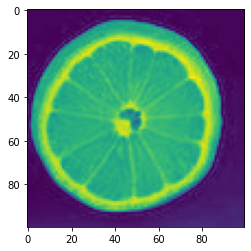

In [12]:
plt.imshow(img_average_channel)
plt.show()

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

Identity Matrix is a square matrix with 1s along the diagonal of the matrix and 0s otherwise.
When a matrix is multiplied with an identity matrix the result is the matrix itself.

In [14]:
identity_matrix = np.eye(img_average_channel.shape[0])
print("Shape of identity matrix : ", identity_matrix.shape)

Shape of identity matrix :  (100, 100)


In [15]:
print("5th row of identity_matrix : ", identity_matrix[4])

5th row of identity_matrix :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


From the above printed row of the identity matrix we can see that the entry in the index (5,5)[1-based indexing] 
is 1, whereas every other entry is 0.

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [27]:
rows = np.arange(0, image.shape[0])
print("Array with row numbers : ", rows)
# rows = np.random.shuffle(rows)
print(np.random.shuffle(rows))
print("Shuffled array : ",rows)

Array with row numbers :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
None
Shuffled array :  [78 75 96 37 91 39 14 62 70 95 93 38 41 67 47  0 46 15 32 56  4 71 86 24
 69 22 21 42 36 12 59 66 84 28 10 64 76 73 20 89 40  8 45  9 81 97 68 90
 48  3 17 33 54 16 87 29 98 52 72 80 57 65 27 77 53 30 50 13 25  1 63 94
 61 83 82  6  7 74 55 19 60 99 88 44 79 43 92 49 11 18 85 26 31  2  5 35
 58 34 51 23]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [42]:
T = identity_matrix[rows]
print("First row : ",T[0])
print("Third row : ",T[2])
print("From the above two rows and the previous Part's answer we can see that the T matrix is the \nidentity matrix shuffled based on the rows array that we had created using np.random.shuffle.")

First row :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Third row :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
From the above two rows and the previous Part's answer we can see that the T matrix is the 
identity matrix shuffled based on the rows array that we had created using np.random.shuffle.


In [37]:
print("Shape of T matrix : ", T.shape)

Shape of T matrix :  (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

In [38]:
transformed_image = T @ img_average_channel
print("Shape of the resultant matrix : ", transformed_image.shape)

Shape of the resultant matrix :  (100, 100)


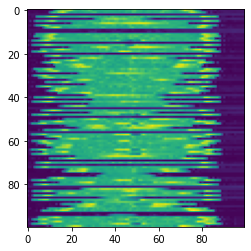

In [39]:
plt.imshow(transformed_image)
plt.show()

From the image above we can see that the image has been scrambled, the rows of the original have been scrambled 
with respect to the array rows that we had created.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Used ChatGPT here to get to know the procedure to do the step
Prompt : "how to see if a matrix is invertible using numpy"

In [44]:
print("To check if T is invertible or not we will check for the determinant of T\n If determinant = 0 -> non-invertible.\n If determinant != 0 -> invertible.")

To check if T is invertible or not we will check for the determinant of T
 If determinant = 0 -> non-invertible.
 If determinant != 0 -> invertible.


In [45]:
invertible = np.linalg.det(T)
if invertible == 0:
    print("T is non-invertible")
else:
    print("T is invertible")

T is invertible


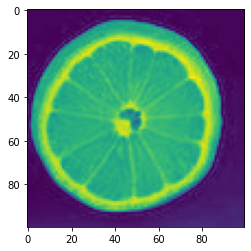

In [50]:
Tinv = np.linalg.inv(T)
old_image = Tinv @ transformed_image
plt.imshow(old_image)
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


If we want to perform the same operations on the columns of the original image, then we can just transpose the
T matrix which will then be regarded as the shuffling of the columns of the original image matrix.

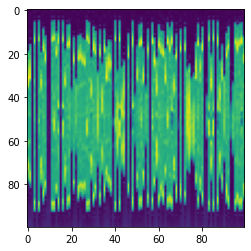

In [56]:
column_transform = img_average_channel @ T.T
plt.imshow(column_transform)
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

If we want to do both the column and row scrambling then we can just multiply both T and transposed T matrix 
with the img_average_channel to get the desired result.

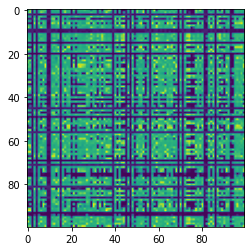

In [52]:
combine_transform = T @ img_average_channel @ T.T
plt.imshow(combine_transform)
plt.show()

And now to retrieve the original image we will inverse this matrix multiplication operation, where we 
will multiply Tinv and Tinv.transpose with the combine_transform image.

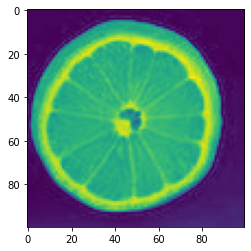

In [54]:
og_image = Tinv @ combine_transform @ Tinv.T
plt.imshow(og_image)
plt.show()